<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [1]:
import pandas as pd
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
detachedhouse = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/คำตอบนักประเมิน(ID).xlsx', sheet_name='บ้าน')
home1 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/Data House.xlsx', sheet_name='บ้านมือ1')
home2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/Data House.xlsx', sheet_name='บ้านมือ2')

In [4]:
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/7-eleven.json') as json_file1:
  seven = json.loads(json_file1.read())

In [5]:
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/school.json') as json_file2:
  school = json.loads(json_file2.read())

## รวมตาราง

### เพิ่ม column second_hand

In [6]:
home1['second_hand'] = "1"
home2['second_hand'] = "2"

In [7]:
home1.columns

Index(['id', 'parent_id', 'project_name', 'province', 'district',
       'sub_district', 'zip_code', 'zone_id', 'zone', 'property_type',
       ...
       'cable_none', 'cable_ask', 'position_previous', 'position_current',
       'sold_out_at', 'is_pro_in_house', 'created_at', 'updated_at',
       'deleted_at', 'second_hand'],
      dtype='object', length=142)

In [8]:
home2.columns

Index(['id', 'name_th', 'name_en', 'project_name', 'company', 'province',
       'district', 'sub_district', 'property_type', 'home improvement',
       'renovate', 'public utility', 'land type', 'land wide(m)',
       'land long(m)', 'topsoil', 'corner', 'zip_code', 'zone', 'alley',
       'street', 'latitude', 'longitude', 'number_of_rai', 'number_of_ngan',
       'number_of_va', 'construct_year', 'model', 'sell_price',
       'number_of_unit', 'number_of_story', 'number_of_bedroom',
       'number_of_bathroom', 'number_of_parking', 'usable_area',
       'central_cost', 'direction', 'furniture', 'building_number',
       'number_of_building', 'floor_number', 'parking_percentage', 'has_pool',
       'has_keycard', 'has_security', 'has_fitness', 'has_garden',
       'second_hand'],
      dtype='object')

In [9]:
home1['renovate'] = "no"

In [10]:
home1 = home1[['id','latitude', 'longitude','property_type','second_hand','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [11]:
home2 = home2[['id','latitude', 'longitude','property_type','second_hand','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [12]:
home1=home1[:-88]
home1

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,314.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0
1,315.0,16.392304,102.827926,บ้านแฝด,1,no,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0
2,316.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0
3,317.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0
4,318.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,29475.0,16.459083,102.947862,บ้านเดี่ยว,1,no,NaN,NaN,60.00,1.0,3.0,2.0,0.0,0.0,133.0,2.0,2590000.0
662,29590.0,16.404943,102.849861,บ้านเดี่ยว,1,no,NaN,NaN,118.20,2.0,3.0,3.0,0.0,0.0,0.0,2.0,5900000.0
663,29642.0,16.475943,102.865463,บ้านเดี่ยว,1,no,NaN,NaN,48.00,1.0,3.0,2.0,0.0,0.0,125.0,2.0,2590000.0
664,29653.0,15.795787,102.640933,บ้านเดี่ยว,1,no,NaN,NaN,80.00,1.0,3.0,2.0,0.0,0.0,133.0,2.0,2999999.0


### รวมตาราง บ้านมือ1 และ บ้านมือ 2

In [13]:
home_1 = pd.concat([home1, home2], ignore_index=True, sort=False)

In [14]:
home_1

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,314.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.00,2.0,3950000.0
1,315.0,16.392304,102.827926,บ้านแฝด,1,no,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.00,2.0,3250000.0
2,316.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.00,2.0,6300000.0
3,317.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.00,3.0,6900000.0
4,318.0,16.392304,102.827926,บ้านเดี่ยว,1,no,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.00,2.0,4490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,20460P,16.480110,102.574033,บ้านเดี่ยว,2,no,0.0,0.0,73.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,NaN,437400.0
2318,20462P,16.528551,102.411762,บ้านเดี่ยว,2,no,0.0,0.0,84.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,NaN,714600.0
2319,20463P,15.867444,102.482085,บ้านเดี่ยว,2,no,0.0,1.0,45.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,NaN,451000.0
2320,20466P,16.636912,102.105343,บ้านเดี่ยว,2,no,0.0,1.0,59.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,NaN,910000.0


### check missing

In [15]:
home_1.isnull().any()

id                    False
latitude               True
longitude              True
property_type         False
second_hand           False
renovate               True
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
direction             False
furniture             False
usable_area            True
number_of_parking      True
sell_price             True
dtype: bool

In [16]:
home_1 = home_1.fillna({'renovate':0,'number_of_va':0,'number_of_story':0,'number_of_bedroom':0,'number_of_bathroom':0,'usable_area':0,'number_of_rai':0,'number_of_ngan':0,'direction':'ไม่ระบุ','furniture':'ไม่ระบุ','number_of_parking':'0.0'})

In [17]:
home_1.isnull().any()

id                    False
latitude               True
longitude              True
property_type         False
second_hand           False
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price             True
dtype: bool

In [18]:
home_1 = home_1[home_1['latitude']!=0]
home_1 = home_1[home_1['longitude']!=0]
home_1

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,314.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.00,2.0,3950000.0
1,315.0,16.392304,102.827926,บ้านแฝด,1,no,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.00,2.0,3250000.0
2,316.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.00,2.0,6300000.0
3,317.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.00,3.0,6900000.0
4,318.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.00,2.0,4490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,20460P,16.480110,102.574033,บ้านเดี่ยว,2,no,0.0,0.0,73.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,0.0,437400.0
2318,20462P,16.528551,102.411762,บ้านเดี่ยว,2,no,0.0,0.0,84.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,0.0,714600.0
2319,20463P,15.867444,102.482085,บ้านเดี่ยว,2,no,0.0,1.0,45.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,0.0,451000.0
2320,20466P,16.636912,102.105343,บ้านเดี่ยว,2,no,0.0,1.0,59.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,0.0,910000.0


In [19]:
home_1 = home_1.dropna(subset=['latitude','longitude','sell_price'])

In [20]:
home_1.isnull().any()

id                    False
latitude              False
longitude             False
property_type         False
second_hand           False
renovate              False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
dtype: bool

### แก้ค่าlocation 


*   latitude <90 
*   longitude <180



In [21]:
home_1.describe()

,latitude,longitude,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,usable_area,sell_price
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03
mean,16.711110,102.966761,0.250328,0.264770,60.056761,1.134792,2.074836,1.947046,131.491755,3.587789e+06
std,5.168199,4.995272,2.625052,2.069165,53.213128,1.030720,2.130609,1.050517,902.272322,4.260508e+06
min,13.752233,100.493675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,16.403432,102.743643,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,1.890000e+06
50%,16.440098,102.799695,0.000000,0.000000,57.000000,1.000000,3.000000,2.000000,97.000000,2.700000e+06
75%,16.486725,102.840579,0.000000,0.000000,73.100000,2.000000,3.000000,3.000000,161.000000,3.999000e+06
max,111.000000,222.000000,67.000000,95.000000,786.000000,32.000000,40.000000,14.000000,40572.000000,1.048840e+08


In [22]:
home_1[home_1['longitude']>180] #longitudeต้อง <180

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
1024,3273.0,111.0,222.0,บ้านเดี่ยว,2,0,0.0,0.0,77.0,1.0,3.0,2.0,ไม่ระบุ,ตกแต่งครบ,265.0,2.0,4800000.0
1028,3287.0,111.0,222.0,บ้านเดี่ยว,2,no,0.0,0.0,77.0,1.0,3.0,2.0,ไม่ระบุ,ตกแต่งครบ,265.0,2.0,4800000.0
1035,3307.0,111.0,222.0,บ้านเดี่ยว,2,no,0.0,0.0,77.0,1.0,3.0,2.0,ไม่ระบุ,ตกแต่งครบ,265.0,2.0,4800000.0
1044,3345.0,111.0,222.0,บ้านเดี่ยว,2,no,0.0,0.0,77.0,1.0,3.0,2.0,ไม่ระบุ,ตกแต่งครบ,275.0,2.0,4800000.0


In [23]:
home_1.drop([1024,1028,1035,1044], axis=0, inplace=True)       

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
home_1

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,314.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.00,2.0,3950000.0
1,315.0,16.392304,102.827926,บ้านแฝด,1,no,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.00,2.0,3250000.0
2,316.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.00,2.0,6300000.0
3,317.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.00,3.0,6900000.0
4,318.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.00,2.0,4490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,20460P,16.480110,102.574033,บ้านเดี่ยว,2,no,0.0,0.0,73.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,0.0,437400.0
2318,20462P,16.528551,102.411762,บ้านเดี่ยว,2,no,0.0,0.0,84.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,0.0,714600.0
2319,20463P,15.867444,102.482085,บ้านเดี่ยว,2,no,0.0,1.0,45.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,0.0,451000.0
2320,20466P,16.636912,102.105343,บ้านเดี่ยว,2,no,0.0,1.0,59.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,0.0,910000.0


In [25]:
home_1[home_1['latitude']>90] # latitudeต้อง<90

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
1019,3252.0,111.000000,111.000000,บ้านเดี่ยว,2,no,0.0,0.0,77.0,1.0,3.0,2.0,ไม่ระบุ,ตกแต่งครบ,265.0,2.0,4800000.0
1020,3258.0,111.000000,111.000000,บ้านเดี่ยว,2,no,0.0,0.0,77.0,1.0,3.0,2.0,ไม่ระบุ,ตกแต่งครบ,256.0,2.0,4800000.0
2034,20131P,102.739641,102.739641,บ้านเดี่ยว,2,no,2.0,0.0,72.0,1.0,3.0,3.0,ไม่ระบุ,มีบางส่วน,0.0,0.0,6000000.0


In [26]:
home_1.drop([1019,1020,2034], axis=0, inplace=True)  

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
home_1

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,314.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.00,2.0,3950000.0
1,315.0,16.392304,102.827926,บ้านแฝด,1,no,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.00,2.0,3250000.0
2,316.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.00,2.0,6300000.0
3,317.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.00,3.0,6900000.0
4,318.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.00,2.0,4490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,20460P,16.480110,102.574033,บ้านเดี่ยว,2,no,0.0,0.0,73.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,0.0,437400.0
2318,20462P,16.528551,102.411762,บ้านเดี่ยว,2,no,0.0,0.0,84.00,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,0.0,714600.0
2319,20463P,15.867444,102.482085,บ้านเดี่ยว,2,no,0.0,1.0,45.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,0.0,451000.0
2320,20466P,16.636912,102.105343,บ้านเดี่ยว,2,no,0.0,1.0,59.00,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,0.0,910000.0


In [28]:
home_1 = home_1.drop_duplicates(subset='id',inplace=False)

In [29]:
home_1[home_1['id']=="20460P"]

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
2136,20460P,16.48011,102.574033,บ้านเดี่ยว,2,no,0.0,0.0,73.0,1.0,2.0,3.0,ไม่ระบุ,ไม่ระบุ,108.76,0.0,437400.0


## ตาราง seven

In [ ]:
sevenkeys = list(seven.keys())
sevenkeys

In [31]:
len(seven)

3653

In [32]:
seven_id = {}
for t in seven:
    l = list()
    for x in seven[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    seven_id[t]=l

In [33]:
seven_id

{'1': [],
 '4': [],
 '6': [{'lat': 16.0603149, 'lng': 102.7264856},
  {'lat': 16.0564741, 'lng': 102.7268436},
  {'lat': 16.0595413, 'lng': 102.7294307},
  {'lat': 16.0751998, 'lng': 102.7356017},
  {'lat': 16.070648, 'lng': 102.7344055},
  {'lat': 16.0582995, 'lng': 102.7360953},
  {'lat': 16.0573901, 'lng': 102.7192322}],
 '7': [],
 '9': [],
 '11': [{'lat': 15.809535, 'lng': 102.6069684},
  {'lat': 15.8193062, 'lng': 102.6012589},
  {'lat': 15.8125848, 'lng': 102.6009202},
  {'lat': 15.8102763, 'lng': 102.5985417},
  {'lat': 15.8095537, 'lng': 102.5879272},
  {'lat': 15.7970035, 'lng': 102.6075296}],
 '16': [{'lat': 16.1340329, 'lng': 102.5331697},
  {'lat': 16.1294298, 'lng': 102.540669}],
 '17': [{'lat': 16.4052438, 'lng': 102.7823961},
  {'lat': 16.3898169, 'lng': 102.8053144},
  {'lat': 16.4221806, 'lng': 102.8047853},
  {'lat': 16.4083692, 'lng': 102.7948258},
  {'lat': 16.4053255, 'lng': 102.7746538}],
 '18': [{'lat': 16.4506978, 'lng': 102.7955315},
  {'lat': 16.445794, 'lng':

In [34]:
home_1

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,314.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,50.00,2.0,4.0,3.0,0.0,0.0,185.00,2.0,3950000.0
1,315.0,16.392304,102.827926,บ้านแฝด,1,no,0.0,0.0,40.00,2.0,4.0,3.0,0.0,0.0,165.00,2.0,3250000.0
2,316.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,77.25,2.0,4.0,3.0,0.0,0.0,260.00,2.0,6300000.0
3,317.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,81.25,2.0,6.0,5.0,0.0,0.0,343.00,3.0,6900000.0
4,318.0,16.392304,102.827926,บ้านเดี่ยว,1,no,0.0,0.0,55.00,2.0,4.0,4.0,0.0,0.0,223.00,2.0,4490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,30336P,16.325266,102.871054,บ้านเดี่ยว,2,0,0.0,0.0,0.00,1.0,3.0,1.0,ไม่ระบุ,มีบางส่วน,258.00,0.0,2300000.0
2307,30339P,16.541658,102.759666,บ้านเดี่ยว,2,0,0.0,0.0,0.00,0.0,3.0,2.0,ไม่ระบุ,ตกแต่งครบ,155.00,0.0,6500000.0
2308,30340P,16.541678,102.759666,บ้านเดี่ยว,2,0,0.0,0.0,0.00,0.0,3.0,4.0,ไม่ระบุ,ตกแต่งครบ,250.00,0.0,9500000.0
2310,30342P,16.356065,102.601876,บ้านเดี่ยว,2,no,0.0,3.0,10.00,0.0,4.0,3.0,ไม่ระบุ,ไม่ระบุ,213.75,0.0,1299100.0


In [35]:
seven_1 = seven_id['18']
seven_1

[{'lat': 16.4506978, 'lng': 102.7955315},
 {'lat': 16.445794, 'lng': 102.8242206},
 {'lat': 16.4410003, 'lng': 102.8216208},
 {'lat': 16.4600404, 'lng': 102.8247777},
 {'lat': 16.4421359, 'lng': 102.8198991},
 {'lat': 16.4512089, 'lng': 102.795423},
 {'lat': 16.4423, 'lng': 102.808299},
 {'lat': 16.464662, 'lng': 102.8251211},
 {'lat': 16.4656851, 'lng': 102.8249423},
 {'lat': 16.4463944, 'lng': 102.8200097},
 {'lat': 16.4622829, 'lng': 102.8270049},
 {'lat': 16.4781927, 'lng': 102.8199828},
 {'lat': 16.4777682, 'lng': 102.8235898},
 {'lat': 16.4786388, 'lng': 102.814293},
 {'lat': 16.4740341, 'lng': 102.8262668}]

In [36]:
home_2 = home_1[home_1['id']==18]
home_2

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
669,18.0,16.459052,102.806404,บ้านเดี่ยว,2,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0


In [37]:
home_2['latitude'].values[0]

16.4590524

In [38]:
home_2['longitude'].values[0]

102.8064042

In [39]:
seven_1[0]

{'lat': 16.4506978, 'lng': 102.7955315}

In [40]:
seven_1[0]['lat']

16.4506978

In [41]:
import geopy.distance

In [42]:
loc1 = [home_2['latitude'].values[0],home_2['longitude'].values[0]]
loc2 = [seven_1[0]['lat'],seven_1[0]['lng']]

In [43]:
geopy.distance.geodesic(loc1,loc2).m

1484.218612126178

In [44]:
id = 18

In [45]:
home_2 = home_1[home_1['id']==id]
home_2

,id,latitude,longitude,property_type,second_hand,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
669,18.0,16.459052,102.806404,บ้านเดี่ยว,2,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0


In [46]:
home_2['latitude'].values[0]

16.4590524

In [47]:
h_lat = home_2['latitude'].values[0]
h_long = home_2['longitude'].values[0]

In [48]:
seven_1 = seven_id[str(id)]
seven_1

[{'lat': 16.4506978, 'lng': 102.7955315},
 {'lat': 16.445794, 'lng': 102.8242206},
 {'lat': 16.4410003, 'lng': 102.8216208},
 {'lat': 16.4600404, 'lng': 102.8247777},
 {'lat': 16.4421359, 'lng': 102.8198991},
 {'lat': 16.4512089, 'lng': 102.795423},
 {'lat': 16.4423, 'lng': 102.808299},
 {'lat': 16.464662, 'lng': 102.8251211},
 {'lat': 16.4656851, 'lng': 102.8249423},
 {'lat': 16.4463944, 'lng': 102.8200097},
 {'lat': 16.4622829, 'lng': 102.8270049},
 {'lat': 16.4781927, 'lng': 102.8199828},
 {'lat': 16.4777682, 'lng': 102.8235898},
 {'lat': 16.4786388, 'lng': 102.814293},
 {'lat': 16.4740341, 'lng': 102.8262668}]

### คำนวณระยะทางระหว่างแต่ละ เซเว่น กับ บ้าน

In [49]:
seven_dist = list()
loc1 = [h_lat,h_long]
for seven in seven_1:
    loc2 = [seven['lat'],seven['lng']]
    dist = geopy.distance.geodesic(loc1,loc2).m
    seven_dist.append(dist)
    
seven_dist

[1484.218612126178,
 2402.6413939919544,
 2575.1637427773207,
 1965.0824686520152,
 2362.498263808865,
 1458.9570016866207,
 1864.8875125537193,
 2092.8707040630675,
 2111.283222296189,
 2018.2142479426961,
 2228.7194550773297,
 2566.8698802679914,
 2767.182197328974,
 2325.4370530372057,
 2692.075902262818]

In [50]:
def cal_seven_radius(seven_dist_list,radius):
    num = 0 #เริ่มตัวนับ
    for seven in seven_dist_list:
        if seven < radius:
            num = num + 1
    return num

In [51]:
import numpy as np

In [52]:
np.array(seven_dist) < 1500

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False])

In [53]:
sum(np.array(seven_dist) < 1500)

2

In [54]:
cal_seven_radius(seven_dist,1500)

2

In [55]:
sum(np.array(seven_dist) < 2000)

4

In [56]:
record_list =list()

In [57]:
record_dict = {}
record_dict['id'] = id
record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)

In [58]:
record_dict

{'id': 18, 'd200-7/11': 0, 'd500-7/11': 0, 'd1000-7/11': 0, 'd2000-7/11': 4}

In [59]:
record_list.append(record_dict)

In [60]:
pd.DataFrame(record_list)

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,18,0,0,0,4


In [61]:
home_1['id'].apply(str)

0        314.0
1        315.0
2        316.0
3        317.0
4        318.0
         ...  
2306    30336P
2307    30339P
2308    30340P
2310    30342P
2321    30358P
Name: id, Length: 2267, dtype: object

In [62]:
seven_id['314']=['0']

In [66]:
record_list =list() #list ใหญ่ 
for id in home_1['id']:
    print(id)
    home_2 = home_1[home_1['id']==id] #ตั้งid
    h_lat = home_2['latitude'].values[0] #.values ดึงแค่เลข
    h_long = home_2['longitude'].values[0]  
    seven_1 = seven_id[str(int(id))]
    seven_dist = list()
    loc1 = [h_lat,h_long]
    for seven in seven_1:
        loc2 = [seven['lat'],seven['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        seven_dist.append(dist)

    record_dict = {}
    record_dict['id'] = id
    record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
    record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)
    record_list.append(record_dict)
    
final_table = pd.DataFrame(record_list)


314.0


TypeError: ignored

In [ ]:
final_table

### ตาราง school

In [ ]:
list(school.keys())

In [ ]:
school1 = list(school.keys())

In [ ]:
len(school)

In [ ]:
school['6']

In [ ]:
school_1 = school['18']
school_1

In [ ]:
this_home = home_1[home_1['id']==18]
this_home

In [ ]:
this_home['latitude'].values[0]

In [ ]:
school_1[0]['lat']

In [ ]:
loc1 = [this_home['latitude'].values[0],this_home['longitude'].values[0]]
loc2 = [seven_1[0]['lat'],seven_1[0]['lng']]

In [ ]:
geopy.distance.geodesic(loc1,loc2).m

In [ ]:
id = 18

In [ ]:
this_home = home_1[home_1['id']==id]
this_home

In [ ]:
h_lat = this_home['latitude'].values[0]
h_long = this_home['longitude'].values[0]

In [ ]:
school_1 = school[str(id)]

In [ ]:
school_1

In [ ]:
school_dist = list()
loc1 = [h_lat,h_long]
for school in school_1:
    loc2 = [school['lat'],school['lng']]
    dist = geopy.distance.geodesic(loc1,loc2).m
    school_dist.append(dist)
    
school_dist

In [ ]:
def cal_school_radius(school_dist_list,radius):
    num = 0 #เริ่มตัวนับ
    for school in school_dist_list:
        if school < radius:
            num = num + 1
    return num

In [ ]:
import numpy as np

In [ ]:
np.array(school_dist) < 1000

In [ ]:
sum(np.array(school_dist) < 1000)

In [ ]:
cal_school_radius(school_dist,1000)

In [ ]:
sum(np.array(school_dist) < 2000)

In [ ]:
record_list =list()

In [ ]:
record_dict = {}
record_dict['id'] = id
record_dict['d200-school'] = sum(np.array(school_dist) < 200)
record_dict['d500-school'] = sum(np.array(school_dist) < 500)
record_dict['d1000-school'] = sum(np.array(school_dist) < 1000)
record_dict['d2000-school'] = sum(np.array(school_dist) < 2000)

In [ ]:
record_dict

In [ ]:
record_list.append(record_dict)

In [ ]:
pd.DataFrame(record_list)

In [ ]:
home_1['id']

In [ ]:
record_list =list() #list ใหญ่ 
for id in home_1['id']:
    print(id)
    this_home = home_1[home_1['id']==id] #ตั้งid
    h_lat = this_home['latitude'].values[0] #.values ดึงแค่เลข
    h_long = this_home['longitude'].values[0]
    school_dist = list()
    loc3 = [h_lat,h_long] # loc1 บ้าน ที่อยู่บ้านไม่วนลูป
    for school in school_1:
        loc4 = [school['lat'],school['lng']]
        dist = geopy.distance.geodesic(loc3,loc4).m
        school_dist.append(dist)
    
    record_dict = {}
    record_dict['id'] = id
    record_dict['d200-school'] = sum(np.array(school_dist) < 200)
    record_dict['d500-school'] = sum(np.array(school_dist) < 500)
    record_dict['d1000-school'] = sum(np.array(school_dist) < 1000)
    record_dict['d2000-school'] = sum(np.array(school_dist) < 2000)
    record_list.append(record_dict)
    
final_table2 = pd.DataFrame(record_list)

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

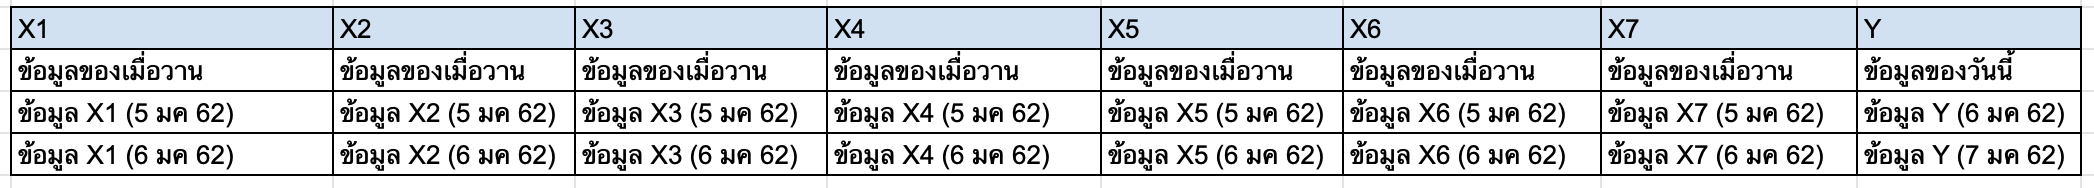



In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/group_quiz.csv')

In [ ]:
weather_data

In [ ]:
weather_data.dtypes

In [ ]:
weather_data_d = weather_data[weather_data.eq('-').any(1)==False]

In [ ]:
weather_data_d = weather_data_d[weather_data_d.eq('T').any(1)==False]

In [ ]:
weather_data_d